In [68]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(8,8))

import json

import pandas as pd


In [69]:
data_filename = "../CAMHDA301-20160101T000000Z.json"

with open(data_filename) as data_file:    
    j = json.load(data_file)


In [82]:
frame_num = [ f["frameNum"] for f in j["stats"]]
similarities = [ f["similarity"] for f in j["stats"] ]

stats = pd.DataFrame(similarities, index=frame_num).sort_index()

print(stats)

                 center  duration_us  flowScale  fromFrame  imgScale  \
0                   NaN      1865495        NaN        NaN       NaN   
10                  NaN      2514967        NaN        NaN       NaN   
20                  NaN      6211664        NaN        NaN       NaN   
30                  NaN      6020111        NaN        NaN       NaN   
40                  NaN       703720        NaN        NaN       NaN   
50                  NaN      6160861        NaN        NaN       NaN   
60                  NaN      6133143        NaN        NaN       NaN   
70                  NaN       830977        NaN        NaN       NaN   
80                  NaN       723288        NaN        NaN       NaN   
90                  NaN       564216        NaN        NaN       NaN   
100                 NaN       682183        NaN        NaN       NaN   
110                 NaN       568477        NaN        NaN       NaN   
120                 NaN       656043        NaN        NaN      

In [83]:
valid = stats[ stats.valid == True ]

# Break the similarity structure out into columns
#similarity = pd.DataFrame.from_records( valid.similarity, valid.index )

## Convert center columns to center_x, center_y
valid = pd.concat( [valid.center.apply( pd.Series ), valid.drop('center', axis=1)], axis=1) \
            .rename( columns={ 0: 'center_x', 1: 'center_y '} )

valid = pd.concat( [valid.similarity.apply( pd.Series ), valid.drop('similarity', axis=1)], axis=1) \
            .rename( columns={ 0: 'scale', 1: 'theta', 2: 'trans_x', 3: 'trans_y'} )
    
print(valid)



          scale  theta   trans_x    trans_y  center_x  center_y   duration_us  \
2100   1.000007    0.0  0.018594   0.013000    -960.0     -540.0     11911206   
4200   1.000940    0.0 -0.750600   0.127520    -960.0     -540.0     11863396   
6300   0.996952    0.0  0.394921  -0.132421    -960.0     -540.0     11922395   
8400   1.053023    0.0 -2.213897   0.128867    -960.0     -540.0     11871544   
10500  0.999985    0.0 -0.004393   0.018797    -960.0     -540.0     11918894   
14700  0.999215    0.0  0.510548  -0.049600    -960.0     -540.0     11897048   
16800  0.998800    0.0 -0.676072   1.084044    -960.0     -540.0      4316496   
16810  0.998658    0.0 -0.340377  -0.373848    -960.0     -540.0      7604219   
16820  0.998235    0.0 -1.209965   0.899660    -960.0     -540.0      5211536   
16830  1.011834    0.0 -2.589820   0.996287    -960.0     -540.0      3809364   
16840  0.996954    0.0  0.354836   0.816124    -960.0     -540.0      2110531   
16850  0.987724    0.0 -0.23

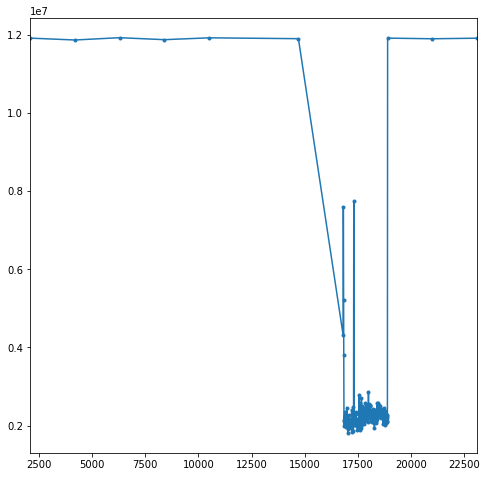

In [88]:

valid.duration_us.plot(style='.-')

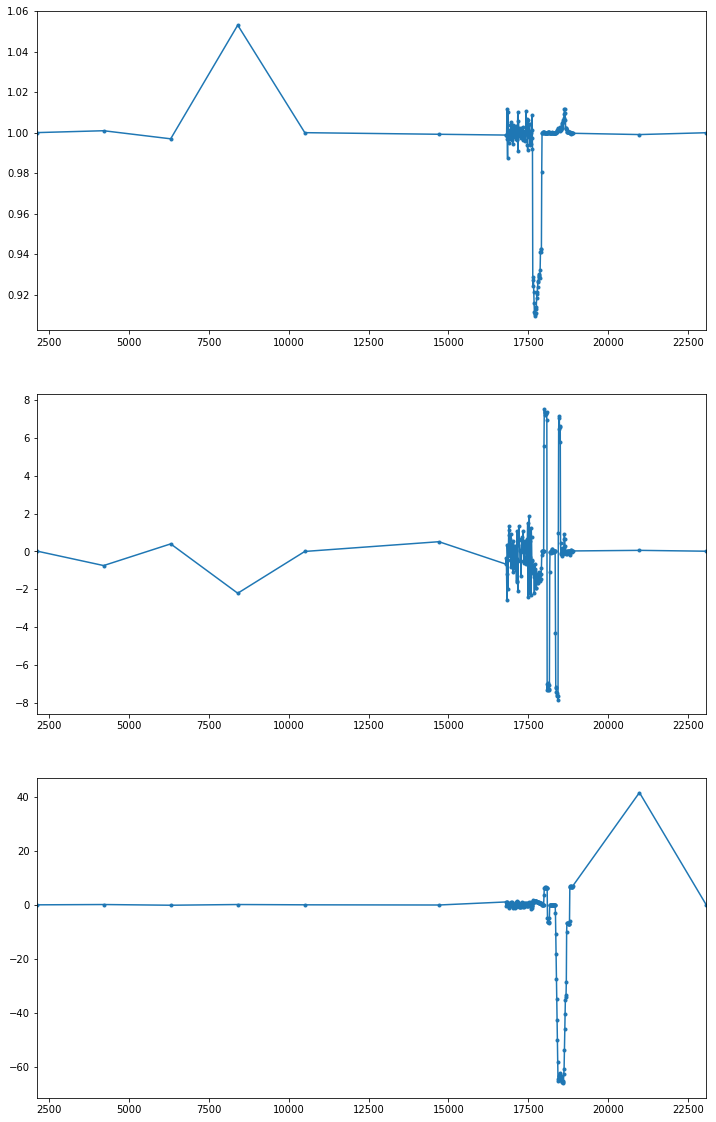

In [93]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12,20))

valid.scale.plot(style='.-', ax=axes[0])
valid.trans_x.plot(style='.-', ax=axes[1])
valid.trans_y.plot(style='.-', ax=axes[2])